In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# ONLY LOAD IF RERUNNING PREPROCESS

# Load in the coldata (information about every cell)
path = os.getcwd()

data_path = f'{path}/Data/'
coldata = pd.read_csv(f"{data_path}raw/coldata.csv") 

# Convert cellsubtypes and types to useful list of types
coldata['source_cluster'] = coldata['cell_type'].str.replace('.*CAF.*', 'CAF', regex=True)

# Select the relevant columns and rename them
relevant_cols = coldata[['TmaID', 'TmaBlock', 'acID', 'ImageNumber', 'CellNumber','Unnamed: 0', 'source_cluster','cell_subtype' ,'Patient_ID','Center_X', 'Center_Y']]
celldata = relevant_cols.rename(columns={"Unnamed: 0": "cellID", 'Center_X':'Location_Center_X', 'Center_Y':'Location_Center_Y'})
cohorts = ['86_A', '86_B', '86_C', '87_A', '87_B', '87_C', '88_A', '88_B', '88_C', '175_A', '175_B', '175_C', '176_A', '176_B', '176_C', '178_A', '178_B', '178_C']

# Create output dir.
# output_path = f"{data_path}/celldata/"
# os.makedirs(output_path, exist_ok=True)

# Create small subset of data for easier visualization and save them
# small_celldata = celldata.iloc[:200000]
# celldata.to_csv(f"{output_path}20240221_celldata.csv", index = False)
# small_celldata.to_csv(f"{output_path}20240221_small_celldata.csv", index = False)
# all_celltypes = celldata['source_cluster'].unique()

celldata

,TmaID,TmaBlock,acID,ImageNumber,CellNumber,cellID,source_cluster,cell_subtype,Patient_ID,Location_Center_X,Location_Center_Y
0,86,A,1,1,4,86_A_1_4,CAF,Collagen_CAF,86_1,337.611111,20.500000
1,86,A,1,1,7,86_A_1_7,CAF,hypoxic_CAF,86_1,370.000000,20.500000
2,86,A,1,1,27,86_A_1_27,CAF,mCAF,86_1,352.210526,41.203947
3,86,A,1,1,29,86_A_1_29,CAF,Collagen_CAF,86_1,343.823529,37.882353
4,86,A,1,1,31,86_A_1_31,CAF,hypoxic_CAF,86_1,240.145833,40.104167
...,...,...,...,...,...,...,...,...,...,...,...
5984449,178,C,98,106,2214,178_C_98_2214,Other,Other,178_537,645.947368,394.421053
5984450,178,C,99,107,4,178_C_99_4,Other,Other,178_545,371.384615,12.096154
5984451,178,C,99,107,1499,178_C_99_1499,Other,Other,178_545,44.500000,278.500000
5984452,178,C,99,107,2444,178_C_99_2444,Other,Other,178_545,323.411765,417.705882


In [17]:
# input2 = path + '/SingleCellExperiment Objects/assaydata.csv'
# assay = pd.read_csv(input2) 
# assay

In [18]:
# Create a df to look up metal tag, target and channel combinations
input2 = data_path + 'raw/cp_csv/panel.csv'
cell_meta = pd.read_csv(input2) 
cell_meta
input2 = data_path + 'raw/cp_csv/full_channelmeta.csv'
cell_fc_meta = pd.read_csv(input2, header=None)
cell_fc_meta.index =  cell_fc_meta.index + 1
cm = cell_meta[['Metal Tag', 'Clean_Target']]
cell_fc_meta['channel'] = cell_fc_meta.index.astype(str)
cell_fc_meta['channel'] = 'c' + cell_fc_meta['channel']
cell_fc_meta.rename(columns={cell_fc_meta.columns[0]:'Metal Tag'}, inplace=True)
markerchannel = pd.merge(cell_fc_meta, cm, how='left', on='Metal Tag')
markerchannel

,Metal Tag,channel,Clean_Target
0,Y89,c1,Myeloperoxidase (MPO)
1,In113,c2,FSP1 / S100A4
2,In115,c3,SMA
3,Pr141,c4,Histone H3
4,Nd142,c5,FAP
5,Nd143,c6,HLA-DR
6,Nd144,c7,CD146
7,Nd145,c8,Cadherin-11
8,Nd146,c9,Carbonic Anhydrase IX
9,Sm147,c10,Collagen I + Fibronectin


In [19]:
# input2 = path + '/cp_csv/clinical_data_ROI.csv'
# clin = pd.read_csv(input2) 
# clin

In [20]:
# ONLY LOAD IF RERUNNING PREPROCESS

# Read in the data per TMA cohort 
tmaids= ['86', '87', '88', '175', '176', '178']
tmablocks = ['A', 'B', 'C']
cps = {}
for i in tmaids:
    for j in tmablocks:
        string = i + '_'+ j
        input2 = data_path + f'/raw/cp_csv/{string}_Cells.csv'
        temp = pd.read_csv(input2) 
        cps[string] = temp
        print(string)

86_A
86_B
86_C
87_A
87_B
87_C
88_A
88_B
88_C
175_A
175_B
175_C
176_A
176_B
176_C
178_A
178_B
178_C


In [21]:
# ONLY LOAD IF RERUNNING PREPROCESS

# Select the relevant columns from the data:
# The columns to identify cells and the marker intensities

search_string = 'MeanIntensityCorrectedLS'
cols_with_string = [col for col in cps['86_A'].columns if search_string in col]
# search_string = 'MeanIntensityCorrected_'
# cols_with_NOLSstring = [col for col in cps['86_A'].columns if search_string in col]
cellid_idx = ['Metadata_acid', 'ObjectNumber', 'ImageNumber', *cols_with_string]

MI_dfs = {}
for key in cps.keys():
    MI_df = cps[key][cellid_idx]
    MI_dfs[key] = MI_df
    MI_df.to_csv(f"{data_path}/intermediate/cp_{key}_intensities.csv", index = False)
    print(key)

86_A
86_B
86_C
87_A


In [ ]:
# ONLY LOAD IF RERUNNING PREPROCESS

# Rename columns to join it to the cp data
cd = celldata.rename(columns={'CellNumber': 'ObjectNumber'})

cds = {}
for key in MI_dfs.keys():
    ss = cd[(cd['TmaID'] == int(key[:-2])) & (cd['TmaBlock'] == key[-1])]
    cds[key] = ss
    ss.to_csv(f"{data_path}/intermediate/cd_{key}_clusters.csv")
    print(key)

Cohort: 86 A DONE
Cohort: 86 B DONE
Cohort: 86 C DONE
Cohort: 87 A DONE
Cohort: 87 B DONE
Cohort: 87 C DONE
Cohort: 88 A DONE
Cohort: 88 B DONE
Cohort: 88 C DONE
Cohort: 175 A DONE
Cohort: 175 B DONE
Cohort: 175 C DONE
Cohort: 176 A DONE
Cohort: 176 B DONE
Cohort: 176 C DONE
Cohort: 178 A DONE
Cohort: 178 B DONE
Cohort: 178 C DONE


In [ ]:
# ONLY LOAD IF RERUNNING PREPROCESS

# load and join the dfs 
dfs = {}
for key in MI_dfs.keys():
    path_intensities = f'{data_path}/intermediate/cp_{key}_intensities.csv'
    path_clusters = f'{data_path}/intermediate/cd_{key}_clusters.csv'
    
    dfcluster = pd.read_csv(path_clusters)
    dfintensities = pd.read_csv(path_intensities) 
    # Rename to match
    dfintensities.rename(columns={'Metadata_acid': 'acID', 'ImageNumber': 'ImageNumber_intens'}, inplace=True)

    dfintensities.set_index(['acID', 'ObjectNumber'], inplace=True)
    dfcluster.set_index(['acID', 'ObjectNumber'], inplace=True)
    df = dfcluster.join(dfintensities)
    dfs[key] = df
    df.to_csv(f"{data_path}/intermediate/{key}_clus_int.csv")
    print(key)



86_A
86_B
86_C
87_A
87_B
87_C
88_A
88_B
88_C
175_A
175_B
175_C
176_A
176_B
176_C
178_A
178_B
178_C


In [ ]:
# Line math
# Draw line through myeloid cells plotted HLADR and CD68 to distinguish communities
# Line parameters decided thru inspection
x1,x2,y1,y2 = 0.0000125, 0.00005, 0, 0.00025

a = (y2 - y1) / (x2 - x1)
b = y1 - a * x1

# Function to determine if a point is above or below the line
# DC's are above the line
# Macs below
def above_line(x, y):
    y_line = a * x + b
    if y > y_line:
        return True
    else:
        return False
    

# CD4 cells with FOXp3 c25 < 0.000007 are CD4 and > Treg

for cohort in cohorts:
# df.loc[(df['source_cluster'] == 'cd4') & (df['c25'] < 5), 'source_cluster'] = 'new_value'
    dfs[cohort].loc[(dfs[cohort]['source_cluster'] == 'CD4') & (dfs[cohort]['Intensity_MeanIntensityCorrectedLS_FullStackFiltered_c25'] > 0.000007), 'source_cluster'] = 'CD4_Treg'
    
    dfs[cohort]['aboveline'] = dfs[cohort].apply(lambda row: above_line(row['Intensity_MeanIntensityCorrectedLS_FullStackFiltered_c6'], row['Intensity_MeanIntensityCorrectedLS_FullStackFiltered_c13']), axis=1)
    dfs[cohort].loc[(dfs[cohort]['source_cluster'] == 'Myeloid') & (dfs[cohort]['aboveline'] == True), 'source_cluster'] = 'DC'
    dfs[cohort].loc[(dfs[cohort]['source_cluster'] == 'Myeloid') & (dfs[cohort]['aboveline'] == False), 'source_cluster'] = 'Mac'
    dfs[cohort].drop(columns=['aboveline'], inplace=True)
    dfs[cohort].to_csv(f"{data_path}/intermediate/{cohort}_annotated.csv")




In [ ]:
# #ONLY LOAD IF loading the preprocessed data

# # load and join the dfs 
# dfs = {}
# for key in cohorts:
#     df = pd.read_csv(f"{data_path}/intermediate/{key}_annotated.csv") 
#     dfs[key] = df
# dfs[cohorts[0]].head()



In [ ]:
def plot_markers_per_cell(cohorts, celltypes, channels, size, colors, markerchannel, max_xy=None, savefig=False):
    for cohort in cohorts:
        for idx, ct in enumerate(celltypes):
            df_temp = dfs[cohort][dfs[cohort]['source_cluster'] == ct]
            # df_temp = dfs[cohort][dfs[cohort]['cell_subtype'] == ct]
            if len(channels) == 3:
                plt.scatter((df_temp[f'Intensity_MeanIntensityCorrectedLS_FullStackFiltered_{channels[0]}']), (df_temp[f'Intensity_MeanIntensityCorrectedLS_FullStackFiltered_{channels[1]}']), s=0.1, alpha=1, cmap='hot', c = (df_temp[f'Intensity_MeanIntensityCorrectedLS_FullStackFiltered_{channels[2]}']))
                plt.colorbar(orientation='vertical')
            else:
                plt.scatter((df_temp[f'Intensity_MeanIntensityCorrectedLS_FullStackFiltered_{channels[0]}']), (df_temp[f'Intensity_MeanIntensityCorrectedLS_FullStackFiltered_{channels[1]}']),color=colors[idx],label=ct, s=size, alpha=1)
    if max_xy:
        plt.axis([0, max_xy[0], 0, max_xy[1]])

    markx = markerchannel.loc[markerchannel['channel'] == channels[0], 'Clean_Target'].values[0]
    marky = markerchannel.loc[markerchannel['channel'] == channels[1], 'Clean_Target'].values[0]
    # markz = markerchannel.loc[markerchannel['channel'] == channels[2], 'Clean_Target'].values[0]

    plt.xlabel(f'{channels[0]}:{markx} intensity')
    plt.ylabel(f'{channels[1]}:{marky} intensity')
    plt.title(f'Marker intensities of {celltypes} in {cohort} cohort')
    plt.xticks(rotation=45)
    plt.legend(markerscale=10)
    # plt.plot([0.0000125, 0.00005], [0, 0.00025])

    plt.show()
    if savefig:
        output_path = f"{data_path}/plots/scatter{cohorts}_{markx}_{marky}.jpg"
        plt.savefig(output_path)
    return


markerchannel

,Metal Tag,channel,Clean_Target
0,Y89,c1,Myeloperoxidase (MPO)
1,In113,c2,FSP1 / S100A4
2,In115,c3,SMA
3,Pr141,c4,Histone H3
4,Nd142,c5,FAP
5,Nd143,c6,HLA-DR
6,Nd144,c7,CD146
7,Nd145,c8,Cadherin-11
8,Nd146,c9,Carbonic Anhydrase IX
9,Sm147,c10,Collagen I + Fibronectin


In [ ]:
dfs['86_A']['source_cluster'].unique()

array(['CAF', 'HEV', 'Blood', 'Lymphatic', 'DC', 'Mac', 'Neutrophil',
       'Bcell', 'CD8', 'CD4', 'CD4_Treg', 'normal', 'hypoxic', 'Other'],
      dtype=object)

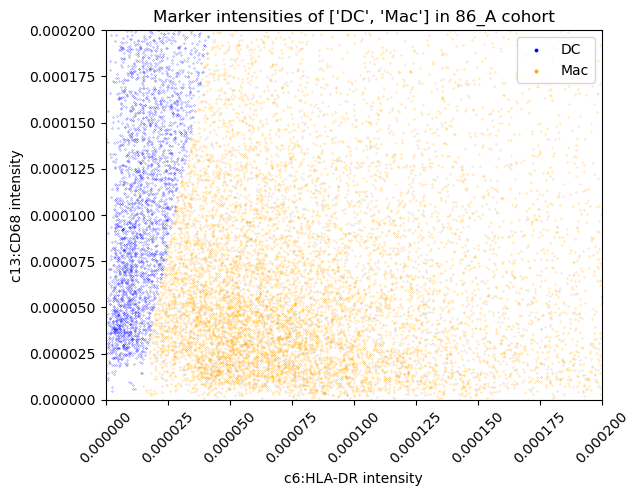

In [ ]:
# Specifiy patient cohort, celltypes, channels and dot size and max x,y window for scatterplot
# cohort = ['86_B', ]
cohort=cohorts[0:1]
celltypes = ['DC', 'Mac']
channels = ['c6', 'c13']
size = 0.03
max_xy = (0.0002,0.0002)
# max_xy = None
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'maroon', 'navy', 'aqua', 'teal']

# Plot the figure
plot_markers_per_cell(cohort, celltypes, channels, size, colors,markerchannel, max_xy, savefig=False)

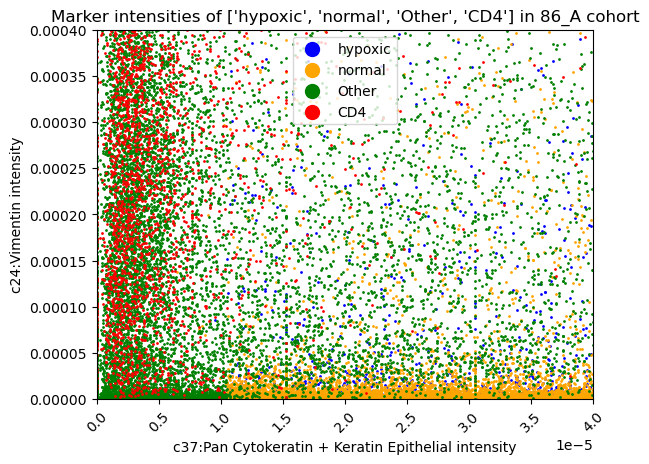

In [ ]:
# Specifiy patient cohort, celltypes, channels and dot size and max x,y window for scatterplot
cohort = ['86_A']
celltypes = ['hypoxic', 'normal', 'Other', 'CD4' ]
channels = ['c37', 'c24']
size = 1
max_xy = (0.00004,0.0004)
# max_xy = None
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'maroon', 'navy', 'aqua', 'teal']

# Plot the figure
plot_markers_per_cell(cohort, celltypes, channels, size, colors,markerchannel, max_xy)

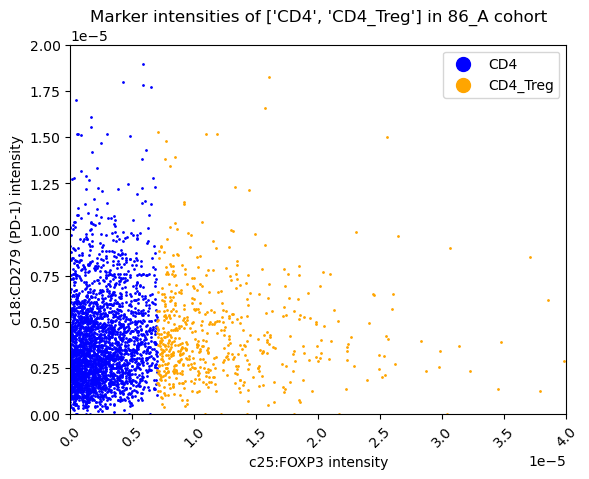

In [ ]:
# Specifiy patient cohort, celltypes, channels and dot size and max x,y window for scatterplot
cohort = ['86_A']
celltypes = ['CD4', 'CD4_Treg']
channels = ['c25', 'c18']
size = 1
max_xy = (0.00004,0.00002)
# max_xy = None

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'maroon', 'navy', 'aqua', 'teal']

# Plot the figure
plot_markers_per_cell(cohort, celltypes, channels, size, colors,markerchannel, max_xy)
# 0.000007

In [ ]:
subtypes = coldata['cell_subtype'].unique()
types = coldata['cell_type'].unique()
category = coldata['cell_category'].unique()
cluster = coldata['source_cluster'].unique()

ct = pd.DataFrame([subtypes,types, category, cluster]).T
ct.columns = ['subtypes','types', 'category', 'cluster']
ct

,subtypes,types,category,cluster
0,Collagen_CAF,Collagen_CAF,Fibroblast,CAF
1,hypoxic_CAF,hypoxic_CAF,vessel,HEV
2,mCAF,mCAF,Immune,Blood
3,SMA_CAF,SMA_CAF,T cell,Lymphatic
4,tpCAF,tpCAF,Tumour,Myeloid
5,iCAF,iCAF,Other,Neutrophil
6,vCAF,vCAF,None,Bcell
7,dCAF,dCAF,None,CD8
8,hypoxic_tpCAF,hypoxic_tpCAF,None,CD4
9,IDO_CAF,IDO_CAF,None,CD4_Treg


In [ ]:
info=coldata[['Unnamed: 0','ImageNumber', 'CellNumber', 'TmaID', 'TmaBlock', 'acID', 'CellID', 'TMA', 'RoiID', 'Patient_Nr', 'ROI', 'Patient_ID']]
info

,Unnamed: 0,ImageNumber,CellNumber,TmaID,TmaBlock,acID,CellID,TMA,RoiID,Patient_Nr,ROI,Patient_ID
0,86_A_1_4,1,4,86,A,1,86_A_1_4,86A,"86_A1,1",1.0,"A1,1",86_1
1,86_A_1_7,1,7,86,A,1,86_A_1_7,86A,"86_A1,1",1.0,"A1,1",86_1
2,86_A_1_27,1,27,86,A,1,86_A_1_27,86A,"86_A1,1",1.0,"A1,1",86_1
3,86_A_1_29,1,29,86,A,1,86_A_1_29,86A,"86_A1,1",1.0,"A1,1",86_1
4,86_A_1_31,1,31,86,A,1,86_A_1_31,86A,"86_A1,1",1.0,"A1,1",86_1
...,...,...,...,...,...,...,...,...,...,...,...,...
5984449,178_C_98_2214,106,2214,178,C,98,178_C_98_2214,178C,"178_C8,6",537.0,"C8,6",178_537
5984450,178_C_99_4,107,4,178,C,99,178_C_99_4,178C,"178_C8,8",545.0,"C8,8",178_545
5984451,178_C_99_1499,107,1499,178,C,99,178_C_99_1499,178C,"178_C8,8",545.0,"C8,8",178_545
5984452,178_C_99_2444,107,2444,178,C,99,178_C_99_2444,178C,"178_C8,8",545.0,"C8,8",178_545
